# <b>Kaggle Titanic Dataset Analysis</b>

Author: Osman Muglu\
Date Created: 09-03-2021\
Data source: https://www.kaggle.com/c/titanic/data

## Index


<ol>
    <li>Forming the dataframe</li>
    <li>Exploratory data analysis</li>
    <li>Conclusion</li>
</ol>

# <b>1. Forming the dataframe</b>

### 1.1 Importing the required packages

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In this data set are 11 columns, these are:
<ul>
<li><b>Survival</b> - Surviving of the incident (0 = No, 1 = Yes), </li>
<li><b>Pclass</b> - Ticket Class(1 = 1st, 2 = 2nd, 3 = 3rd),</li>
<li><b>Sex</b> - Sex,</li>
<li><b>Age</b> - Age in years</li>
<li><b>Sibsp</b> - # of siblings / spouses aboard the Titanic, </li>
<li><b>Parch</b> - # of parents / children aboard the Titanic,</li>
<li><b>Ticket</b> - Ticket number,</li>
<li><b>Fare</b> - Passenger fare,</li>
<li><b>Cabin</b> - Cabin number,</li>
<li><b>Embarked</b> - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)</li>
</ul>  

### 1.2 Read the csv file

In [2]:
df= pd.read_csv("titan_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <b>2. Explotary data analysis</b>


### 2.1 Dataframe description

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.2 Passenger analysis

#### 2.2.1 Sex


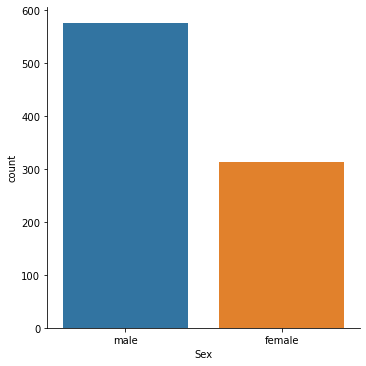

In [6]:
sns.catplot(x='Sex',data=df,kind='count')
plt.show()

#### 2.2.2 Gender over the different classes

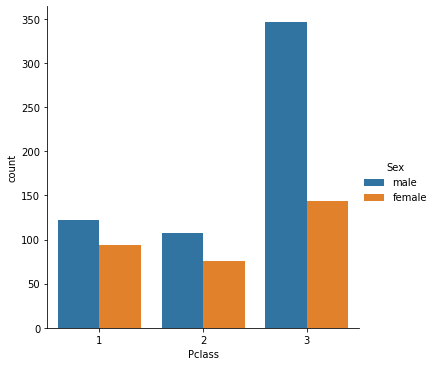

In [7]:
sns.catplot(x='Pclass',data=df,hue='Sex',kind='count')
plt.show()

#### 2.2.3 Child passengers

<i>Create functiont to detect if a person is a man, woman or child</i>

In [8]:
def man_wom_chi(passenger):
    age=passenger['Age']
    sex=passenger['Sex']
    
    return 'child' if age < 16 else sex

<i>Create new column</i>

In [9]:
df['Person'] = df.apply(man_wom_chi,axis=1)

In [10]:
df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

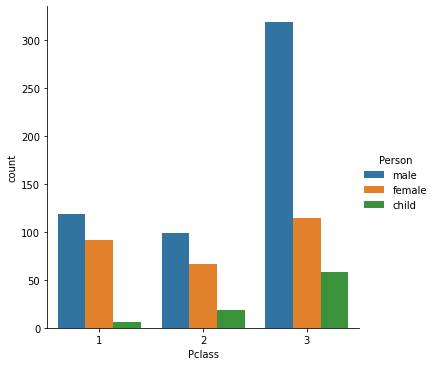

In [11]:
sns.catplot(x='Pclass',data=df,hue='Person',kind='count')
plt.show()

#### 2.2.4 Distirbution of passengers of different age groups

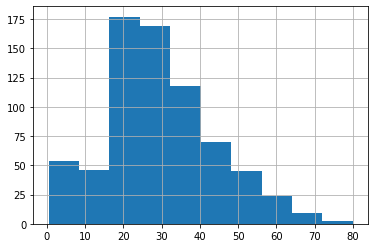

In [12]:
df['Age'].hist()
plt.show()

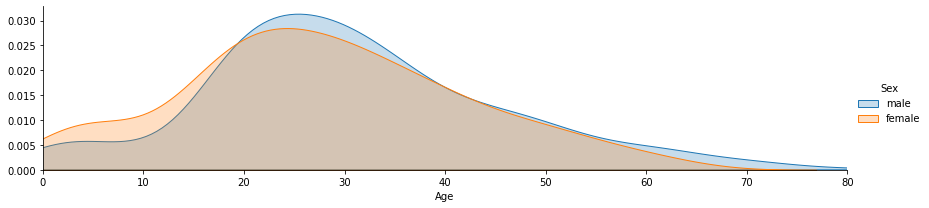

In [13]:
fig = sns.FacetGrid(df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

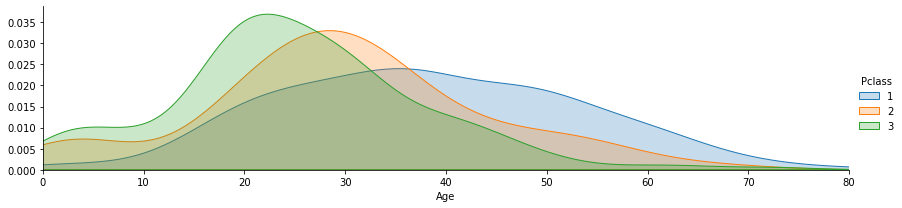

In [14]:
fig = sns.FacetGrid(df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

### 2.3 Titanic level (deck) analysis

<i>Drop missing vlaues</i>

In [15]:
deck_df = df.dropna(axis=0)

<i>Create a function to get the deck from the cabin numbers</i>

In [16]:
def get_level(passenger):
    cabin = passenger['Cabin']
    return cabin[0]

<i>Create new column</i>

In [17]:
deck_df['level']=deck_df.apply(get_level,axis=1)

<ipython-input-17-8c6422001496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deck_df['level']=deck_df.apply(get_level,axis=1)


In [18]:
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,level
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,C


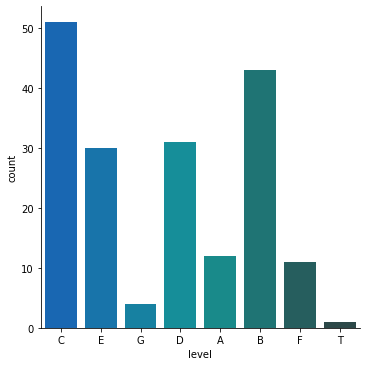

In [19]:
sns.catplot(x='level',data=deck_df,palette='winter_d',kind='count')
plt.show()

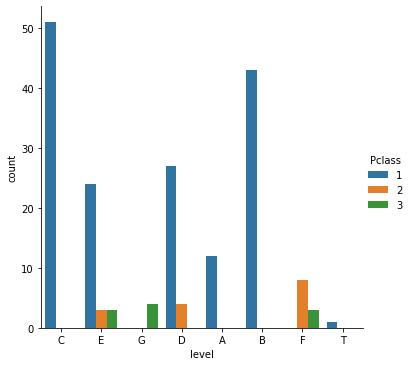

In [20]:
sns.catplot(x='level',data=deck_df,hue='Pclass',kind='count')
plt.show()

### 2.4 Embarkation analysis

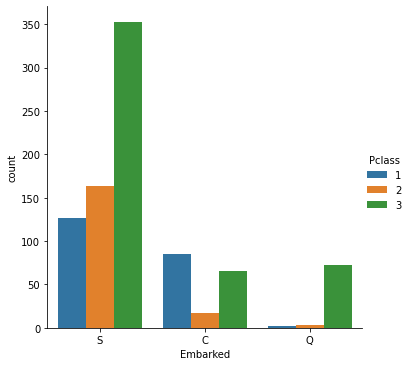

In [21]:
sns.catplot(x='Embarked',data=df,hue='Pclass',kind='count')
plt.show()

### 2.5 Survival analysis

<i>Factor: class</i>

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


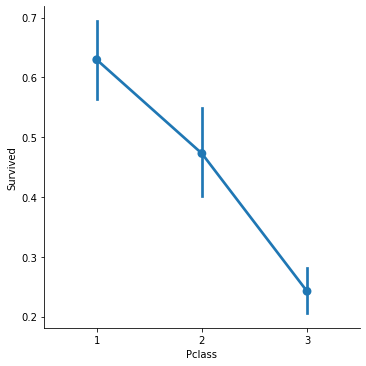

In [22]:
sns.factorplot(x='Pclass',y='Survived',data=df)
plt.show()

<i>Factor: person</i>

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


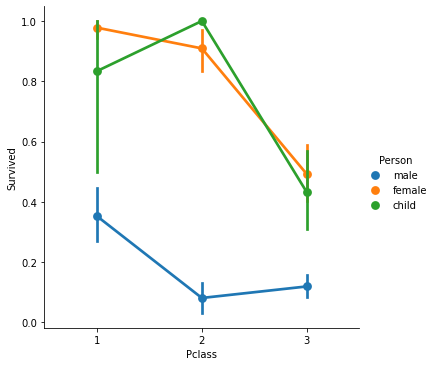

In [23]:
sns.factorplot(x='Pclass',y='Survived',hue='Person',data=df)
plt.show()

<i>Factor: age</i>

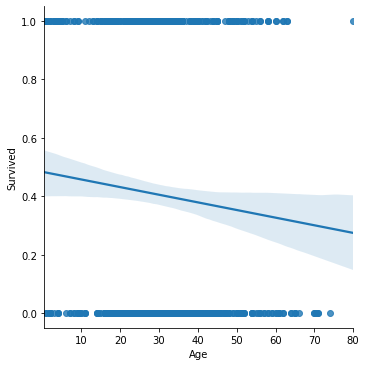

In [24]:
sns.lmplot(x='Age',y='Survived',data=df)
plt.show()

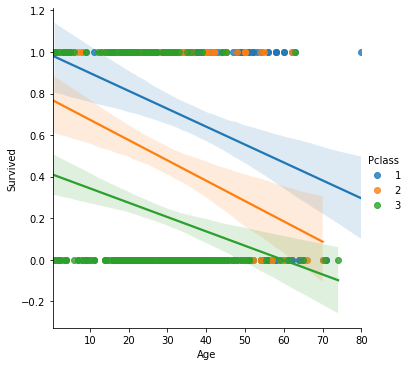

In [25]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=df)
plt.show()

### 3. Conclusions

<b>2.2 - Passenger analysis</b>\
2.2.1 - Sex: Looking at the data we can see that, there were more males than females on the Titanic.\
2.2.2 – Gender over the different classes: It is noticeable from the data that there are twice as many men as women in the third class.\
2.2.3 – Child passengers: The data shows, the more luxurious the classes, the fewer children are present.\
2.2.4 – Distribution of passengers of different age groups: most passengers of the Titanic were between 20 and 40 years old. The age distribution seems to be less varied in terms of male and female passengers. However, we can also see in the data that the higher the class, the older the passengers are.\

<b>2.3 – Titanic level (deck) analysis</b>\
The data shows us that level C had the most passengers. However, looking at the second graph we see that the upper classes have been assigned to the upper levels. Levels A, B, and C were only assigned to the passengers of the first class, but we need to keep in mind that a lot of cabin data was missing. \

<b>2.4 – Embarkation analysis:</b> \
From the data, we can see that most people have embarked at Southampton. What is also noticeable from the data that at Queenstown, that there were almost no first and second-class passengers that were embarked. \

<b>2.5 – Survival analysis:</b>\
Factor: class - Passengers from lower classes, had a lower chance of survival. \
Factor: person - Men had lower chances of survival than women and children.\
Factor: age – It doesn’t matter from which class you are, the older passengers were less likely to survive.  